In [1]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam 
from keras.utils import np_utils

In [2]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

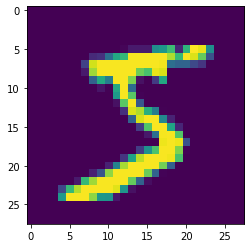

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)

In [9]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(number_of_classes,activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',optimizer="Adam", metrics=['accuracy'])

In [11]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 178s 95ms/step - loss: 0.2705 - accuracy: 0.9506 - val_loss: 0.1077 - val_accuracy: 0.9662
Epoch 2/5
1875/1875 [==============================] - 183s 98ms/step - loss: 0.0701 - accuracy: 0.9788 - val_loss: 0.0732 - val_accuracy: 0.9772
Epoch 3/5
1875/1875 [==============================] - 180s 96ms/step - loss: 0.0474 - accuracy: 0.9850 - val_loss: 0.0872 - val_accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 178s 95ms/step - loss: 0.0367 - accuracy: 0.9881 - val_loss: 0.0852 - val_accuracy: 0.9758
Epoch 5/5
1875/1875 [==============================] - 179s 95ms/step - loss: 0.0306 - accuracy: 0.9903 - val_loss: 0.0967 - val_accuracy: 0.9792


In [12]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.09674471616744995, 0.979200005531311]


In [13]:
prediction=model.predict(x_test[:4])
print(prediction)

[[4.6975783e-14 2.5727326e-16 1.1528057e-11 2.4744812e-11 3.8862464e-17
  3.0591359e-17 1.3997026e-19 1.0000000e+00 9.4763151e-13 1.6743369e-11]
 [9.8070410e-14 4.7171539e-13 1.0000000e+00 3.8455774e-15 1.2588232e-18
  2.5884769e-21 2.8038611e-09 1.7888232e-23 2.7474080e-12 9.2032666e-23]
 [3.3286460e-11 9.9999928e-01 3.0654836e-09 1.5969127e-11 2.7746324e-08
  6.8627211e-09 2.3947493e-12 7.3596691e-11 7.3280557e-07 1.0296256e-11]
 [1.0000000e+00 3.5657711e-17 1.9830654e-13 9.1033532e-19 1.7211784e-18
  1.8852104e-14 6.3710621e-12 3.5205584e-18 1.6228484e-14 8.2631195e-13]]


In [14]:
import numpy  as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.09674471616744995, 0.979200005531311]


In [16]:
prediction=model.predict(x_test[:4])
print(prediction)

[[4.6975783e-14 2.5727326e-16 1.1528057e-11 2.4744812e-11 3.8862464e-17
  3.0591359e-17 1.3997026e-19 1.0000000e+00 9.4763151e-13 1.6743369e-11]
 [9.8070410e-14 4.7171539e-13 1.0000000e+00 3.8455774e-15 1.2588232e-18
  2.5884769e-21 2.8038611e-09 1.7888232e-23 2.7474080e-12 9.2032666e-23]
 [3.3286460e-11 9.9999928e-01 3.0654836e-09 1.5969127e-11 2.7746324e-08
  6.8627211e-09 2.3947493e-12 7.3596691e-11 7.3280557e-07 1.0296256e-11]
 [1.0000000e+00 3.5657711e-17 1.9830654e-13 9.1033532e-19 1.7211784e-18
  1.8852104e-14 6.3710621e-12 3.5205584e-18 1.6228484e-14 8.2631195e-13]]


In [17]:
import numpy  as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
model.save('mnnistCNN.h5')

In [21]:
!tar -zcvf model_new.tgz mnnistCNN.h5

mnnistCNN.h5


In [22]:
ls -l

total 4696
-rw-rw---- 1 wsuser wscommon 2475368 Nov 18 19:26 mnnistCNN.h5
-rw-rw---- 1 wsuser wscommon 2324777 Nov 18 19:27 model_new.tgz
drwxr-x--- 2 wsuser wscommon    4096 Nov 18 19:25 models/


In [23]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 14.1 MB/s eta 0:00:01


In [29]:
from ibm_watson_machine_learning import APIClient

wml_creds = {"url":"https://us-south.ml.cloud.ibm.com",
            "apikey":"kamKUTKuTfljr1yXQEiqCYKnwlGJdHmsc9O9i4R5GbGe"}

client = APIClient(wml_creds)

In [30]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [33]:
space_uid = guid_from_space_name(client,'imageclassificaation')


In [34]:
print(space_uid)

2728a210-5e94-4bc3-bea6-af135dd11515


In [56]:
client.set.default_space(space_uid)
client.software_specifications.list(limit=500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [65]:
sofware_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
print(sofware_spec_uid)
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='QNPCa0OErcm2TfycFQT1Wf7Z4do64khV32iFoTBcXkGv',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'mnist-donotdelete-pr-ofpgdsuuhm7gkp'
object_key = 'sample.png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


acd9c798-6974-5d2f-a657-ce06e986df4d


In [59]:
model_details = client.repository.store_model(model = "model_new.tgz",meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:sofware_spec_uid})

model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [63]:
from PIL import Image

In [66]:
img = Image.open(streaming_body_1).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [67]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [69]:
pred = model.predict(im2arr)
print(pred)
print(np.argmax(pred, axis=1)) #printing our Labels

[[4.5537013e-10 5.1446252e-12 1.7567010e-09 1.1802422e-08 5.7735950e-13
  3.8638447e-13 1.2984079e-15 1.0000000e+00 4.8662785e-10 2.2376396e-08]]
[7]


In [70]:
client.repository.download(model_id,'DigitRecognition_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecognition_IBM_model.tar.gz'


'/home/wsuser/work/DigitRecognition_IBM_model.tar.gz'